In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("retail_relay.csv")

In [3]:
df.head()

,orderId,orderDate,userId,totalCharges,commonId,pupId,pickupDate,orderYear,orderMonth,orderDay,purchaseOccasion,orderPeriod,orderQuarter,cohortMonthly,cohortQuarterly
0,262,2009-01-11T00:00:00Z,47,50.67,TRQKD,2,2009-01-12T00:00:00Z,2009,1,11,1,1,1,1,1
1,278,2009-01-20T00:00:00Z,47,26.60,4HH2S,3,2009-01-20T00:00:00Z,2009,1,20,2,1,1,1,1
2,294,2009-02-03T00:00:00Z,47,38.71,3TRDC,2,2009-02-04T00:00:00Z,2009,2,3,3,2,1,1,1
3,301,2009-02-06T00:00:00Z,47,53.38,NGAZJ,2,2009-02-09T00:00:00Z,2009,2,6,4,2,1,1,1
4,302,2009-02-06T00:00:00Z,47,14.28,FFYHD,2,2009-02-09T00:00:00Z,2009,2,6,5,2,1,1,1


In [4]:
df.columns

Index(['orderId', 'orderDate', 'userId', 'totalCharges', 'commonId', 'pupId',
       'pickupDate', 'orderYear', 'orderMonth', 'orderDay', 'purchaseOccasion',
       'orderPeriod', 'orderQuarter', 'cohortMonthly', 'cohortQuarterly'],
      dtype='object')

In [5]:
# Select relevent columns
dfSub = df[['orderId', 'orderDate', 'totalCharges', 'userId']]

print(dfSub.shape)

dfSub.head()

(2891, 4)


,orderId,orderDate,totalCharges,userId
0,262,2009-01-11T00:00:00Z,50.67,47
1,278,2009-01-20T00:00:00Z,26.60,47
2,294,2009-02-03T00:00:00Z,38.71,47
3,301,2009-02-06T00:00:00Z,53.38,47
4,302,2009-02-06T00:00:00Z,14.28,47


In [6]:
dfSub.isna().sum()

orderId         0
orderDate       0
totalCharges    0
userId          0
dtype: int64

In [7]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 4 columns):
orderId         2891 non-null int64
orderDate       2891 non-null object
totalCharges    2891 non-null float64
userId          2891 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 90.5+ KB


In [8]:
dfSub.loc[:, 'orderDate'] = pd.to_datetime(dfSub['orderDate'])
dfSub.head()

D:\programme\anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,orderId,orderDate,totalCharges,userId
0,262,2009-01-11 00:00:00+00:00,50.67,47
1,278,2009-01-20 00:00:00+00:00,26.60,47
2,294,2009-02-03 00:00:00+00:00,38.71,47
3,301,2009-02-06 00:00:00+00:00,53.38,47
4,302,2009-02-06 00:00:00+00:00,14.28,47


In [72]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 4 columns):
orderId         2891 non-null int64
orderDate       2891 non-null datetime64[ns, UTC]
totalCharges    2891 non-null float64
userId          2891 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(2)
memory usage: 90.5 KB


In [9]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

dfSub['orderMonth'] = dfSub['orderDate'].apply(get_month)
dfSub['cohortMonth'] = dfSub.groupby('userId')['orderMonth'].transform('min')

D:\programme\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\programme\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
dfSub.head()

,orderId,orderDate,totalCharges,userId,orderMonth,cohortMonth
0,262,2009-01-11 00:00:00+00:00,50.67,47,2009-01-01,2009-01-01
1,278,2009-01-20 00:00:00+00:00,26.60,47,2009-01-01,2009-01-01
2,294,2009-02-03 00:00:00+00:00,38.71,47,2009-02-01,2009-01-01
3,301,2009-02-06 00:00:00+00:00,53.38,47,2009-02-01,2009-01-01
4,302,2009-02-06 00:00:00+00:00,14.28,47,2009-02-01,2009-01-01


In [11]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

order_year, order_month, _ = get_date(dfSub, 'orderMonth')
cohort_year, cohort_month, _ = get_date(dfSub, 'cohortMonth')

year_diff = order_year - cohort_year
month_diff = order_month - cohort_month

dfSub['cohortIndex'] = year_diff * 12 + month_diff + 1
dfSub.head()

D:\programme\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,orderId,orderDate,totalCharges,userId,orderMonth,cohortMonth,cohortIndex
0,262,2009-01-11 00:00:00+00:00,50.67,47,2009-01-01,2009-01-01,1
1,278,2009-01-20 00:00:00+00:00,26.60,47,2009-01-01,2009-01-01,1
2,294,2009-02-03 00:00:00+00:00,38.71,47,2009-02-01,2009-01-01,2
3,301,2009-02-06 00:00:00+00:00,53.38,47,2009-02-01,2009-01-01,2
4,302,2009-02-06 00:00:00+00:00,14.28,47,2009-02-01,2009-01-01,2


In [12]:
cohort_data = dfSub.groupby(['cohortMonth', 'cohortIndex'])['userId'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'cohortIndex',
                                      columns = 'cohortMonth',
                                      values = 'userId')
cohort_count

cohortMonth,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01,2010-03-01
cohortIndex,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,NaN
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,NaN,NaN
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,NaN,NaN,NaN
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN
6,8.0,4.0,2.0,7.0,6.0,5.0,10.0,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN
7,8.0,4.0,2.0,4.0,3.0,3.0,11.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
8,7.0,5.0,3.0,6.0,5.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7.0,5.0,2.0,2.0,5.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

cohort_data = dfSub.groupby(['cohortIndex', 'orderMonth'])['totalCharges'].sum().reset_index()
cohort_table = cohort_data.pivot_table(
    index = 'cohortIndex',
    columns = 'orderMonth',
    values = 'totalCharges'
)

px.imshow(cohort_table, color_continuous_scale='RdBu_r')

In [13]:
cohort_size = cohort_count.iloc[:, 0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

cohortMonth,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01,2010-03-01
cohortIndex,,,,,,,,,,,,,,,
1,100.0,68.2,59.1,177.3,227.3,145.5,227.3,140.9,168.2,245.5,590.9,295.5,431.8,454.5,109.1
2,100.0,37.5,50.0,162.5,162.5,187.5,287.5,137.5,187.5,212.5,400.0,212.5,625.0,237.5,NaN
3,100.0,50.0,50.0,100.0,120.0,90.0,130.0,90.0,140.0,120.0,260.0,180.0,260.0,NaN,NaN
4,100.0,11.1,44.4,144.4,55.6,66.7,111.1,77.8,88.9,144.4,322.2,77.8,NaN,NaN,NaN
5,100.0,40.0,10.0,60.0,40.0,70.0,110.0,60.0,130.0,130.0,130.0,NaN,NaN,NaN,NaN
6,100.0,50.0,25.0,87.5,75.0,62.5,125.0,100.0,112.5,87.5,NaN,NaN,NaN,NaN,NaN
7,100.0,50.0,25.0,50.0,37.5,37.5,137.5,50.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,71.4,42.9,85.7,71.4,42.9,100.0,57.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,71.4,28.6,28.6,71.4,142.9,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


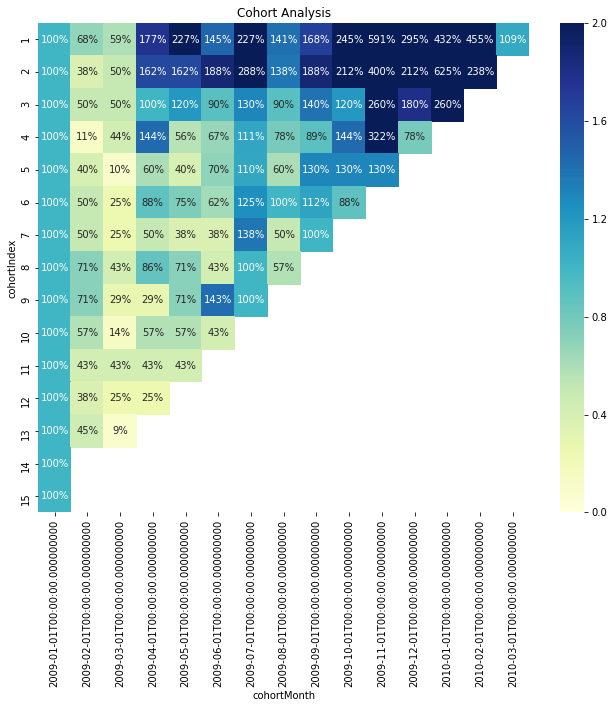

In [102]:
plt.figure(figsize = (11, 9))
plt.title('Cohort Analysis')
sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 2,
           cmap = "YlGnBu")
plt.show()